
# An Attempt at Graphics Improvement
Re-imagining the graphics from a random science paper on east coast mussels.

I was not so randomly made aware of a particular paper and thought I would attempt to make some of the figures in the paper a little better in communicating information.

In [3]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [4]:
# read data into dataframes
# original spreadsheet sheets were saved as individual csv files
nutrients_df = pd.read_csv('gbi12458-sup-0002-Nutrients-0002-supinfo.csv')
bulk_df = pd.read_csv('gbi12458-sup-0002-bulk-supinfo.csv')
csia_df = pd.read_csv('gbi12458-sup-0002-csia-supinfo.csv')
mol_df = pd.read_csv('gbi12458-sup-0002-mol-supinfo.csv')

# Fig. 2

The original Fig. 2 as presented in the paper:
<img src='original-fig2.png' width="400" height="400">
The 2a figure, as described in the text of the article, shows that the Chincoteague tissue is significantly different from the Norfolk and Baltimore sites and that Norfolk and Baltimore data overlaps. Figure 2b shows that differences in patch size at the Norfolk site was not significant.

The change in scales between figures makes comparison difficult.  Although the color and symbol are coded, the legend must be consulted to determine which data belongs to which site or patch size.

In [5]:
# create individual datasets from data
# this will make plotting easier
bulk_not_sediment = bulk_df[bulk_df['tissue.type'] == 'adductor']
norfolk = bulk_not_sediment[bulk_not_sediment['seep.site'] == 'norfolk']
norfolk = norfolk[norfolk.d13c < -40.0]   # get rid of outliers?
norfolk_small = norfolk[norfolk['sample.id'].str.match('HRS1704.GEX03.009')]
norfolk_medium = norfolk[norfolk['sample.id'].str.match('HRS1704.GEX03.011')]
norfolk_large = norfolk[norfolk['sample.id'].str.match('HRS1704.GEX03.023')]
baltimore = bulk_not_sediment[bulk_not_sediment['seep.site'] == 'baltimore']
chincoteague = bulk_not_sediment[bulk_not_sediment['seep.site'] == 'chincoteague']

In [6]:
# code to calculate standard ellipse
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


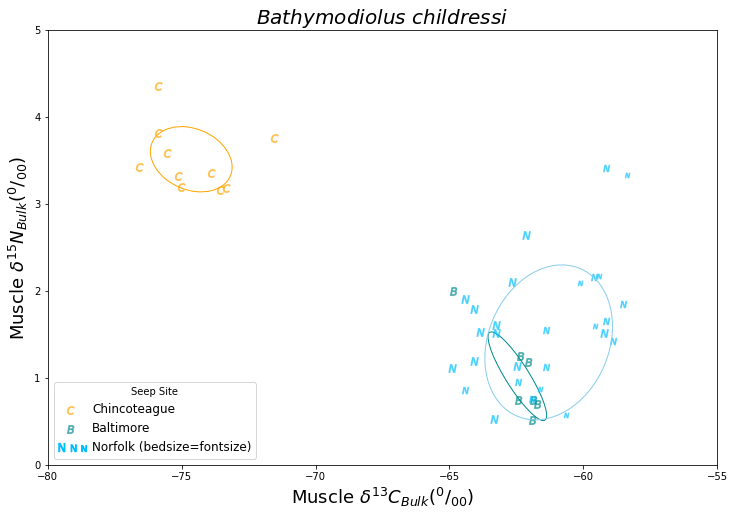

In [7]:
# reimagine Fig. 2
# ubuntu needs texlive, texlive-latex-extra, & cm-super to get 'usetex=True' to work error free
import matplotlib as mpl
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
c = ax.scatter(chincoteague.d13c, chincoteague.d15n, marker='$C$', s=64, color='orange', label='Chincoteague', alpha=0.5)
confidence_ellipse(chincoteague.d13c, chincoteague.d15n, ax, n_std=1.0, edgecolor='orange')
b = ax.scatter(baltimore.d13c, baltimore.d15n, marker='$B$', s=64, color='darkcyan', label='Baltimore', alpha=0.5)
confidence_ellipse(baltimore.d13c, baltimore.d15n, ax, n_std=1.0, edgecolor='darkcyan')
ax.scatter(norfolk_large.d13c, norfolk_large.d15n, marker='$N$', s=64, color='deepskyblue', label='Norfolk (large)', alpha=0.5)
ax.scatter(norfolk_medium.d13c, norfolk_medium.d15n, marker='$N$', s=44, color='deepskyblue', label='Norfolk (medium)',alpha=0.5)
ax.scatter(norfolk_small.d13c, norfolk_small.d15n, marker='$N$', s=24, color='deepskyblue', label='Norfolk (small)', alpha=0.5)
confidence_ellipse(norfolk.d13c, norfolk.d15n, ax, n_std=1.0, edgecolor='skyblue')
ax.set_xlim(-80,-55)
ax.set_ylim(0,5)
ax.set_xlabel('Muscle $\delta^{13}C_{Bulk}(^{0}/_{00})$', size=18)
ax.set_ylabel('Muscle $\delta^{15}N_{Bulk}(^{0}/_{00})$', size=18)
ax.set_title('$Bathymodiolus \ childressi$', size=20)
# legend uses latex and Line2D proxy artist 
m = mpl.text.TextPath((-1.5,-0.5), r'\large{N} \normalsize{N} \small{N}', size=12, usetex=True)
n = mpl.lines.Line2D([],[], marker=m, markersize=32, linewidth=0, color='deepskyblue')
ax.legend([c, b, n], ['Chincoteague', 'Baltimore','Norfolk (bedsize=fontsize)'], loc='lower left', title='Seep Site', fontsize=12)
plt.show()

The title makes reference to figure explanation less important.  Geometric shapes have been replaced by letters coded to the Seep Site making the legend less important.  For Norfolk, the bed size is shown by font size making the second graph less important and all data is on one graph.  Standard ellipse for Norfolk Seep Site now includes all Norfolk data showing less importance of bed size between Seep Sites although this is at the expense of the elimiation of individual ellipses for each patch size.  Norfolk font size shows visual gradiant of $\delta^{13}$C from right to left.

# Fig. 3

I came across this article: https://nightingaledvs.com/ive-stopped-using-box-plots-should-you/ which makes a strong case for not using box plots because they don't really give a good sense of the individual distributions of the data.

In [8]:
# massage the data
csia_df.index = csia_df['Sample.ID']
csia_df_filter = csia_df.filter(items=['Site.name','tissue.type','Glu.N','Asp.N','Ala.N','Ile.N','Leu.N','Pro.N','Val.N','Gly.N','Ser.N','Lys.N','Phe.N','Thr.N'])
csia_df_filter.columns = ['Site','tissue.type','Glu','Asp','Ala','Ile','Leu','Pro','Val','Gly','Ser','Lys','Phe','Thr']

csia_df_filter.loc[csia_df_filter.Site == 'chincoteague', 'Site'] = 'Chincoteague'
csia_df_filter.loc[csia_df_filter.Site == 'baltimore', 'Site'] = 'Baltimore'

csia_muscle = csia_df_filter[csia_df_filter['tissue.type'] == 'Adductor']
csia_muscle = csia_muscle.drop(columns=['tissue.type'])
csia_muscle = csia_muscle.filter(regex='075|053|023', axis=0)
csia_muscle['Site'][csia_muscle['Site'] == 'Norfolk'] = 'Norfolk (023)'

csia_gill = csia_df_filter[csia_df_filter['tissue.type'] == 'Gill']
csia_gill = csia_gill.drop(columns=['tissue.type'])
csia_gill = csia_gill.filter(regex='075|053|023', axis=0)
csia_gill['Site'][csia_gill['Site'] == 'Norfolk'] = 'Norfolk (023)'


In [9]:
# melt data for seaborn plots
cs_m_m = pd.melt(csia_muscle, id_vars='Site')
cs_g_m = pd.melt(csia_gill, id_vars='Site')
cs_m_m.columns = ['Site','Amino Acid','$\delta^{15}N(^{0}/_{00})$']
cs_g_m.columns = ['Site','Amino Acid','$\delta^{15}N(^{0}/_{00})$']

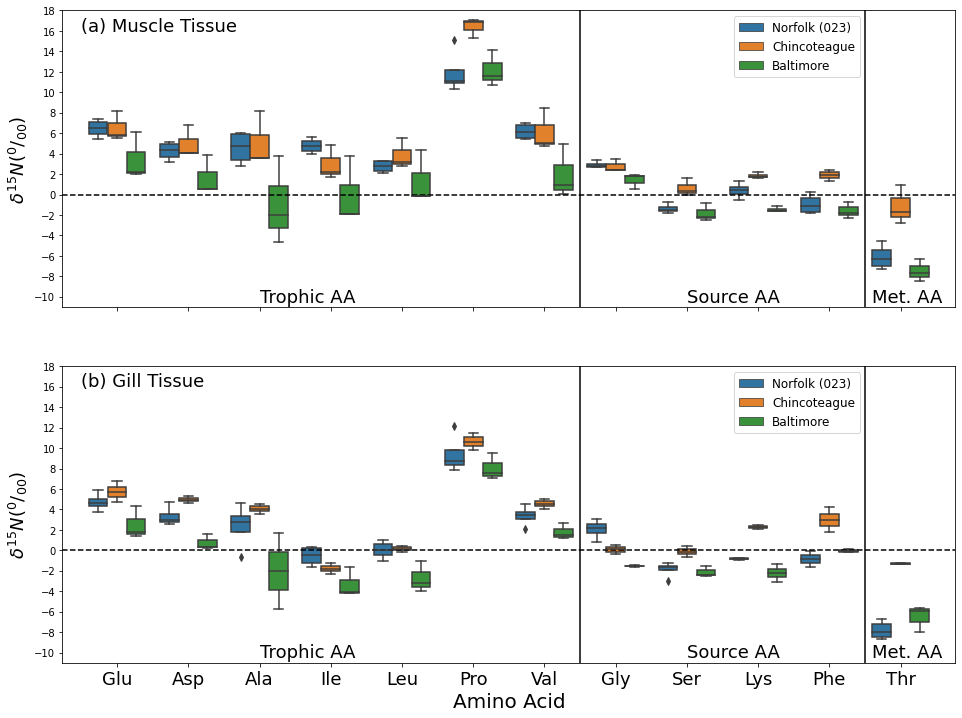

In [10]:
# Fig 3 original boxplot format from paper
fig, ax = plt.subplots(2, 1, figsize=(16, 12), sharex=True)
sns.boxplot(x='Amino Acid', y='$\delta^{15}N(^{0}/_{00})$', hue='Site', data=cs_m_m, dodge=True, ax=ax[0])
sns.boxplot(x='Amino Acid', y='$\delta^{15}N(^{0}/_{00})$', hue='Site', data=cs_g_m, dodge=True, ax=ax[1])

# same stuff added to each graph
for a in [0,1]:
    # set ylim
    ax[a].set_ylim(ymin=-11, ymax=18)
    # matplotlib is smart enough to truncate axis if not needed
    ax[a].set_yticks(ticks=np.linspace(-10,18,15))
    # set label size and weight
    ax[a].set_xticklabels(ax[a].get_xticklabels(), size=18, fontweight=500)
    ax[a].set_xlabel('Amino Acid', size=20, fontweight=500)
    ax[a].set_ylabel('$\delta^{15}N(^{0}/_{00})$', size=18, fontweight=500)
    # plot hline
    ax[a].axline((0,0), (1,0), color='black', linestyle='--')
    # plot vlines
    ax[a].axline((6.5,0), (6.5,1), color='black', linestyle='-')
    ax[a].axline((10.5,0), (10.5,1), color='black', linestyle='-')
    # add annotations
    ax[a].annotate('Trophic AA', (2, -10.5), size=18)
    ax[a].annotate('Source AA', (8, -10.5), size=18)
    ax[a].annotate('Met. AA', (10.6,-10.5), size=18)
    # place legend in strange location
    ax[a].legend(loc='upper right', bbox_to_anchor=(0.9,1.0), fontsize=12)
# original has shared axes so lets get rid of xlabel
ax[0].set_xlabel('')
ax[0].annotate('(a) Muscle Tissue', (-0.5, 16.0), size=18)
ax[1].annotate('(b) Gill Tissue', (-0.5, 16.0), size=18)
plt.show()

The use of boxplots implies a richer source of data than actually exists.  The single scale on the left makes values hard to read and the single listing of Amino Acids at the bottom of figure 3b makes it more difficult to associate the labels in figure 3a.

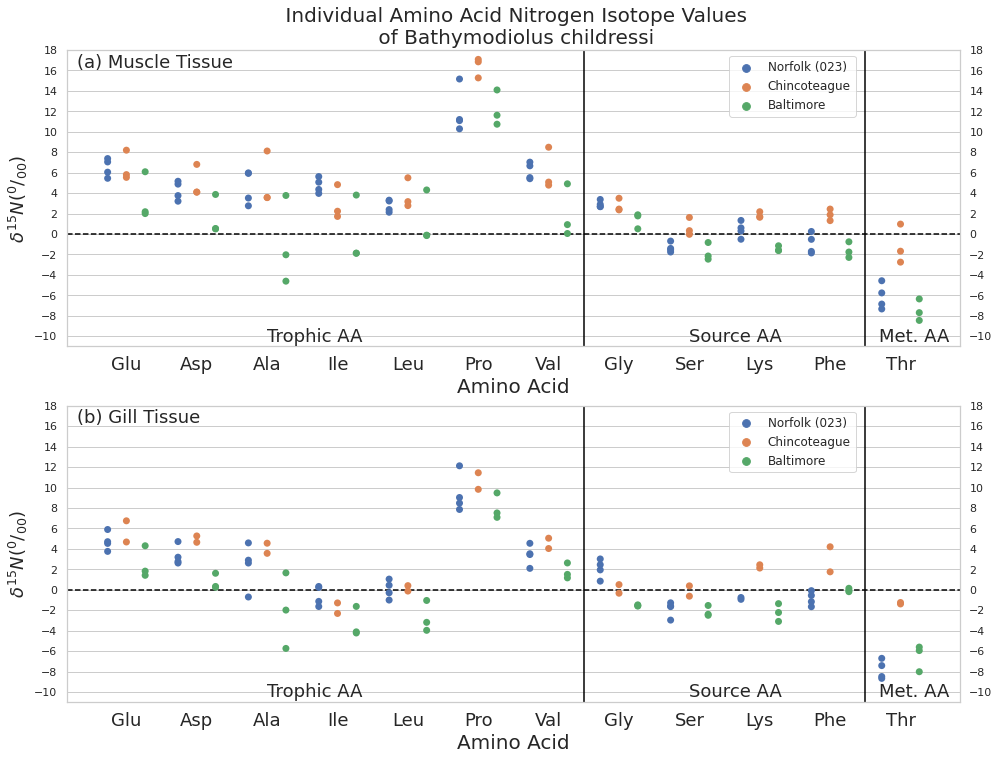

In [11]:
# fig. 3 re-imagined
import seaborn as sns
sns.set_theme(style="whitegrid")


fig, ax = plt.subplots(2, 1, figsize=(16, 12))
sns.stripplot(x='Amino Acid', y='$\delta^{15}N(^{0}/_{00})$', hue='Site', data=cs_m_m, dodge=True, jitter=0, ax=ax[0], size=7)
sns.stripplot(x='Amino Acid', y='$\delta^{15}N(^{0}/_{00})$', hue='Site', data=cs_g_m, dodge=True, jitter=0, ax=ax[1], size=7)

# same stuff added to each graph
for a in [0,1]:
    # set ylim
    ax[a].set_ylim(ymin=-11, ymax=18)
    # matplotlib is smart enough to truncate axis if not needed
    ax[a].set_yticks(ticks=np.linspace(-10,18,15))
    # set label size and weight
    ax[a].set_xticklabels(ax[a].get_xticklabels(), size=18, fontweight=500)
    ax[a].set_xlabel('Amino Acid', size=20, fontweight=500)
    ax[a].set_ylabel('$\delta^{15}N(^{0}/_{00})$', size=18, fontweight=500)
    # also plot y axis on right
    ax[a].tick_params(labelright=True)
    # plot hline
    ax[a].axline((0,0), (1,0), color='black', linestyle='--')
    # plot vlines
    ax[a].axline((6.5,0), (6.5,1), color='black', linestyle='-')
    ax[a].axline((10.5,0), (10.5,1), color='black', linestyle='-')
    # add annotations
    ax[a].annotate('Trophic AA', (2, -10.5), size=18)
    ax[a].annotate('Source AA', (8, -10.5), size=18)
    ax[a].annotate('Met. AA', (10.7,-10.5), size=18)
    # place legend in strange location
    ax[a].legend(loc='upper right', bbox_to_anchor=(0.89,1.0), fontsize=12)


ax[0].annotate('(a) Muscle Tissue', (-0.7, 16.3), size=18)
ax[1].annotate('(b) Gill Tissue', (-0.7, 16.3), size=18)
ax[0].set_title(' Individual Amino Acid Nitrogen Isotope Values\n of Bathymodiolus childressi', size=20)
plt.show()

In the re-imagined plots, we have moved from a boxplot to a stripplot.  The primary reasons for changing plot types is to more accurately show the limited nature of the data and its distribution although the link: https://nightingaledvs.com/ive-stopped-using-box-plots-should-you/ gives other reasons why we might want to use this plot.  A horizontal grid has been added to more easily determine values as has the second axis on the right. Labels have been duplicated for each subplot making it easier to immediately determine which amino acid the data belongs to and a title has been added to make a reference to the figure description only needed for more detailed infromation. The y-axis has been slightly elongated at bottom (to -11) in order to allow more room for the 'Met. AA' label in the gill tissue plot.

The color scheme could also be optimized more to increase contrast to colorblind individuals and simultaneously for photocopying (see Color Brewer).